In [1]:
import params, os, funcs
from jaratoolbox import celldatabase, settings
import numpy as np
import matplotlib.pyplot as plt

# %% Load dataframe
databaseDir = os.path.join(settings.DATABASE_PATH, '2024popanalysis')
fullDbPath = 'celldb_2024popanalysis.h5'
fullPath = os.path.join(databaseDir, fullDbPath)
fullDb = celldatabase.load_hdf(fullPath)
simpleSiteNames = fullDb["recordingSiteName"].str.split(',').apply(lambda x: x[0])
simpleSiteNames = simpleSiteNames.replace("Posterior auditory area", "Dorsal auditory area")
fullDb["recordingSiteName"] = simpleSiteNames
X_speech_all, Y_brain_area_speech_all, X_AM_all = [], [], []
Y_brain_area_AM_all, X_pureTones_all, Y_brain_area_PT_all = [], [], []
previous_frequency_speech, previous_frequency_AM, previous_frequency_PT = None, None, None
indices_AM, indices_PT, indices_speech = None, None, None

/Volumes/NardociData/jarahubdata/figuresdata/2024popanalysis/celldb_2024popanalysis.h5 does not exist or cannot be opened.


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/Volumes/NardociData/jarahubdata/figuresdata/2024popanalysis/celldb_2024popanalysis.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [3]:
# Add data to the dictionary for each brain area and sound type
for subject in params.subject_list:
    for date in params.recordingDate_list[subject]:
        for brain_area in params.targetSiteNames:
            speechEnsemble, speechEphys, speechBdata = funcs.load_data(subject, date, brain_area,
                                                                 "FTVOTBorders")

            if speechEnsemble:
                X_speech, Y_brain_area_speech, Y_frequency_speech = funcs.spike_rate(
                    "speech", speechEnsemble, speechEphys, speechBdata, brain_area)

                X_speech_array, Y_frequency_speech_sorted, previous_frequency_speech, indices_speech = (
                    funcs.adjust_speech_length(subject, date, brain_area, X_speech, Y_frequency_speech,
                                               previous_frequency_speech))

                if X_speech_array is not None:
                    Y_frequency_FT = Y_frequency_speech_sorted[:, 0]
                    Y_frequency_VOT = Y_frequency_speech_sorted[:, 1]

                    # Append the data to the lists
                    X_speech_all.extend(X_speech_array)
                    Y_frequency_speech_2 = Y_frequency_speech_sorted
                    Y_brain_area_speech_all.extend(Y_brain_area_speech)

            # Load and process data for AM
            amEnsemble, amEphys, amBdata = funcs.load_data(subject, date, brain_area, "AM")
            if amEnsemble:
                X_AM, Y_brain_area_AM, Y_frequency_AM = funcs.spike_rate(
                    "AM", amEnsemble, amEphys, amBdata, brain_area)

                # Apply adjustments
                X_AM_adjusted, Y_frequency_AM_adjusted, Yba_AM_adj = (
                    funcs.adjust_array_and_labels(X_AM, Y_frequency_AM, Y_brain_area_AM, 
                                                  params.max_trials['AM'], subject, date, brain_area))

                # Sort arrays
                X_AM_array, Y_frequency_AM_sorted, Y_brain_area_AM_sorted, previous_frequency_AM, indices_AM = (
                    funcs.sort_sound_array(subject, date, brain_area, X_AM_adjusted, Yba_AM_adj, Y_frequency_AM_adjusted, previous_frequency_AM))

                if X_AM_array is not None:
                    # Append the data to the lists
                    X_AM_all.extend(X_AM_array)
                    Y_frequency_AM_2 = Y_frequency_AM_sorted
                    Y_brain_area_AM_all.extend(Y_brain_area_AM_sorted)

            # Load and process data for Pure Tones
            ptEnsemble, ptEphys, ptBdata = funcs.load_data(subject, date, brain_area, "pureTones")
            if ptEnsemble:
                X_pureTones, Y_brain_area_PT, Y_frequency_pureTones = funcs.spike_rate(
                    "PT", ptEnsemble, ptEphys, ptBdata, brain_area)

                # Apply adjustments
                X_PT_adjusted, Y_frequency_PT_adjusted, Yba_PT_adj = (
                    funcs.adjust_array_and_labels(X_pureTones, Y_frequency_pureTones, Y_brain_area_PT,
                                                  params.max_trials['PT'], subject, date, brain_area))

                # Sort arrays
                X_PT_array, Y_frequency_PT_sorted, Y_brain_area_PT_sorted, previous_frequency_PT, indices_PT = (
                    funcs.sort_sound_array(subject, date, brain_area, X_PT_adjusted, Yba_PT_adj, Y_frequency_PT_adjusted, previous_frequency_PT))

                if X_PT_array is not None:
                    # Append the data to the lists
                    X_pureTones_all.extend(X_PT_array)
                    Y_frequency_PT_2 = Y_frequency_PT_sorted
                    Y_brain_area_PT_all.extend(Y_brain_area_PT_sorted)

No FTVOTBorder data for Primary auditory area on 2022-01-11 for feat004
Not enough PT trials recorded for subject feat004, on 2022-01-11 in brain area Primary auditory area.
No FTVOTBorder data for Dorsal auditory area on 2022-01-11 for feat004
Not enough PT trials recorded for subject feat004, on 2022-01-11 in brain area Dorsal auditory area.
No data in Ventral auditory area on 2022-01-11 for Speech, AM, and PT.
No data in Ventral auditory area on 2022-01-11 for Speech, AM, and PT.
No data in Ventral auditory area on 2022-01-11 for Speech, AM, and PT.
No FTVOTBorder data for Primary auditory area on 2022-01-19 for feat004
No FTVOTBorder data for Dorsal auditory area on 2022-01-19 for feat004
No data in Ventral auditory area on 2022-01-19 for Speech, AM, and PT.
No data in Ventral auditory area on 2022-01-19 for Speech, AM, and PT.
No data in Ventral auditory area on 2022-01-19 for Speech, AM, and PT.
No data in Ventral auditory area on 2022-01-21 for Speech, AM, and PT.
No data in Ven

In [4]:
# %% Sort arrays
X_PT_sorted = funcs.sort_x_arrays(X_pureTones_all, indices_PT, "pt")
X_AM_sorted = funcs.sort_x_arrays(X_AM_all, indices_AM, "am")
X_speech_sorted = funcs.sort_x_arrays(X_speech_all, indices_speech, "speech")

# Convert the lists to numpy arrays for easy manipulation
X_speech_array = np.stack(X_speech_sorted, axis=0)
# X_speech_array = X_speech_array.squeeze(axis=1)
X_AM_array = np.stack(X_AM_sorted, axis=0)
X_PT_array = np.stack(X_PT_sorted, axis=0)

In [5]:
data_dict = {}

# Add data to the dictionary for each brain area and sound type
for brain_area in params.targetSiteNames:
    # For speech
    brain_area_array_speech = np.array(Y_brain_area_speech_all)
    X_speech_array_adjusted = X_speech_array[brain_area_array_speech == brain_area]
    X_speech_array_adjusted = X_speech_array_adjusted.T
    # Y_frequency_FT = Y_frequency_speech_sorted[:,0]
    # Y_frequency_VOT = Y_frequency_speech_sorted[:, 1]
    data_dict[(brain_area, 'speech')] = {'X': X_speech_array_adjusted, 'Y': Y_frequency_speech_sorted}
    # data_dict[(brain_area, 'VOT')] = {'X': X_speech_array_adjusted, 'Y': Y_frequency_VOT}

    # For AM
    brain_area_array_AM = np.array(Y_brain_area_AM_all)
    X_AM_array_adjusted = X_AM_array[brain_area_array_AM == brain_area]
    X_AM_array_adjusted = X_AM_array_adjusted.T
    Y_frequency_AM_array_adjusted = Y_frequency_AM_sorted
    data_dict[(brain_area, 'AM')] = {'X': X_AM_array_adjusted, 'Y': Y_frequency_AM_array_adjusted}

    # For pure tones
    brain_area_array_PT = np.array(Y_brain_area_PT_all)
    X_PT_array_adjusted = X_PT_array[brain_area_array_PT == brain_area]
    X_PT_array_adjusted = X_PT_array_adjusted.T
    Y_frequency_PT_array_adjusted = Y_frequency_PT_sorted
    data_dict[(brain_area, 'PT')] = {'X': X_PT_array_adjusted, 'Y': Y_frequency_PT_array_adjusted}

In [6]:
data_dict

{('Primary auditory area',
  'speech'): {'X': array([[-3.51456198e+00,  4.97951465e+01,  1.31316315e+01, ...,
           1.71077790e+00,  2.29445507e+00, -7.72765246e-01],
         [-5.79005269e-03,  1.47074273e+01, -9.03456245e-01, ...,
           5.21954983e+00, -1.21431686e+00, -4.28153718e+00],
         [-5.79005269e-03,  1.11986553e+01,  2.60531568e+00, ...,
          -1.79799403e+00,  2.29445507e+00,  9.75355054e+00],
         ...,
         [ 7.01175381e+00, -9.85397626e+00, -9.03456245e-01, ...,
          -1.79799403e+00,  2.29445507e+00,  2.73600668e+00],
         [-5.79005269e-03,  4.18111146e+00,  9.62285954e+00, ...,
           1.71077790e+00,  2.29445507e+00, -7.72765246e-01],
         [ 7.01175381e+00,  1.47074273e+01,  1.66404034e+01, ...,
          -1.79799403e+00, -1.21431686e+00,  6.24477861e+00]]), 'Y': array([[  0,   0],
         [  0,   0],
         [  0,   0],
         [  0,   0],
         [  0,   0],
         [  0,   0],
         [  0,   0],
         [  0,   0],
 

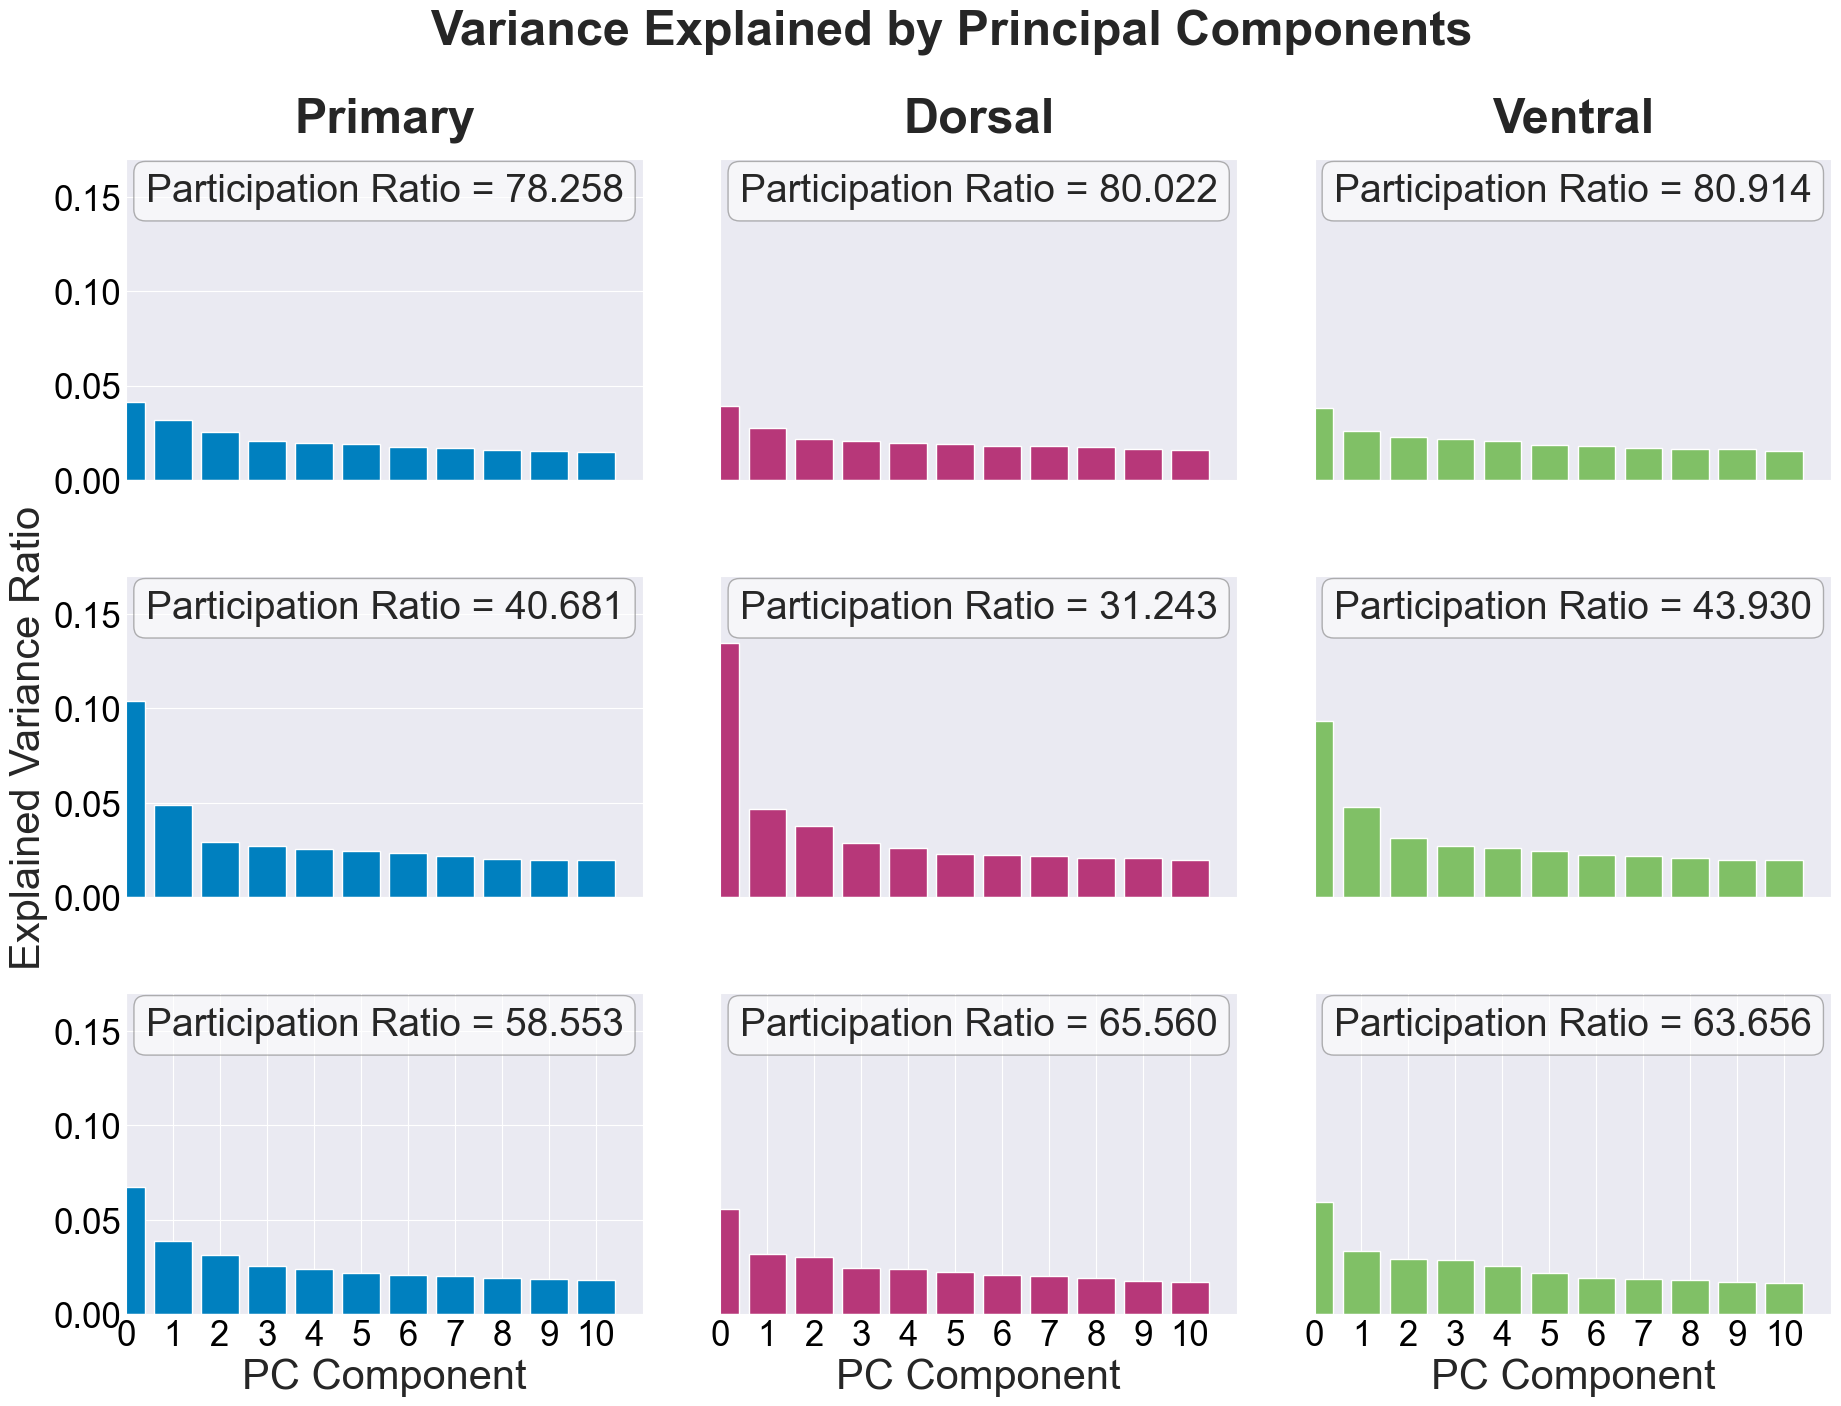

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import cm

# Define brain area to colormap mapping
area_cmaps = {
    "Primary auditory area": cm.winter,
    "Dorsal auditory area": cm.magma,
    "Ventral auditory area": cm.summer,
}

# Constants
y_max = 0.17
sound_types = ['PT', 'AM', 'speech']
brain_areas = params.targetSiteNames  # Assuming 3 areas

fig_scree, axes_scree = plt.subplots(3, 3, figsize=(22, 15))
fig_scree.suptitle('Variance Explained by Principal Components', fontweight='bold', fontsize=35)
plt.subplots_adjust(hspace=0.3, wspace=0.15)

for i, sound_type in enumerate(sound_types):  # Rows
    for j, brain_area in enumerate(brain_areas):  # Columns
        data = data_dict[(brain_area, sound_type)]
        selected_indices = np.random.choice(data['X'].shape[1], 111, replace=False)
        data_111_X = data['X'][:, selected_indices]
        data_neurons = {"X": data_111_X, "Y": data['Y']}

        title = f'{brain_area} - {sound_type}, n = {data_neurons["X"].shape[1]}'
        cmap = area_cmaps.get(brain_area)

        # Standardize and PCA
        scaler = StandardScaler()
        data_standardized = scaler.fit_transform(data_neurons['X'])
        pca = PCA()
        pca.fit(data_standardized)
        explained_variance_ratio = pca.explained_variance_ratio_
        partic_ratio = funcs.calculate_participation_ratio(explained_variance_ratio)

        ax = axes_scree[i, j]
        funcs.plot_scree_plot(
            ax,
            data_standardized,
            title=None,  # No per-plot title
            y_max=y_max,
            particRatio=partic_ratio,
            color=cmap(0.5)
        )

        # General axis labels
        if i == 2:  # Bottom row
            ax.set_xlabel('PC Component', fontsize=30)
            ax.tick_params(axis='x', direction='in', length=6, width=1, colors='black', labelsize=25)
        else:
            ax.set_xticklabels([])
            ax.set_xticks([])
        if j == 0:  # Left column
            ax.tick_params(axis='y', direction='in', length=6, width=1, colors='black', labelsize=25)
            if i == 1:
                ax.set_ylabel('Explained Variance Ratio', fontsize=30)
        else:
            ax.set_yticklabels([])
            ax.set_yticks([])

        # Top row: column titles = brain areas
        if i == 0:
            area_label = brain_area.replace(" auditory area", "")  # Simplify
            ax.set_title(area_label, fontsize=35, fontweight='bold', pad=20)

fig_scree.savefig(
    "/Users/zoetomlinson/Desktop/GitHub/neuronalDataResearch/Figures/Population Plots/PopScreePlots.png",
    dpi=300
)
plt.show()

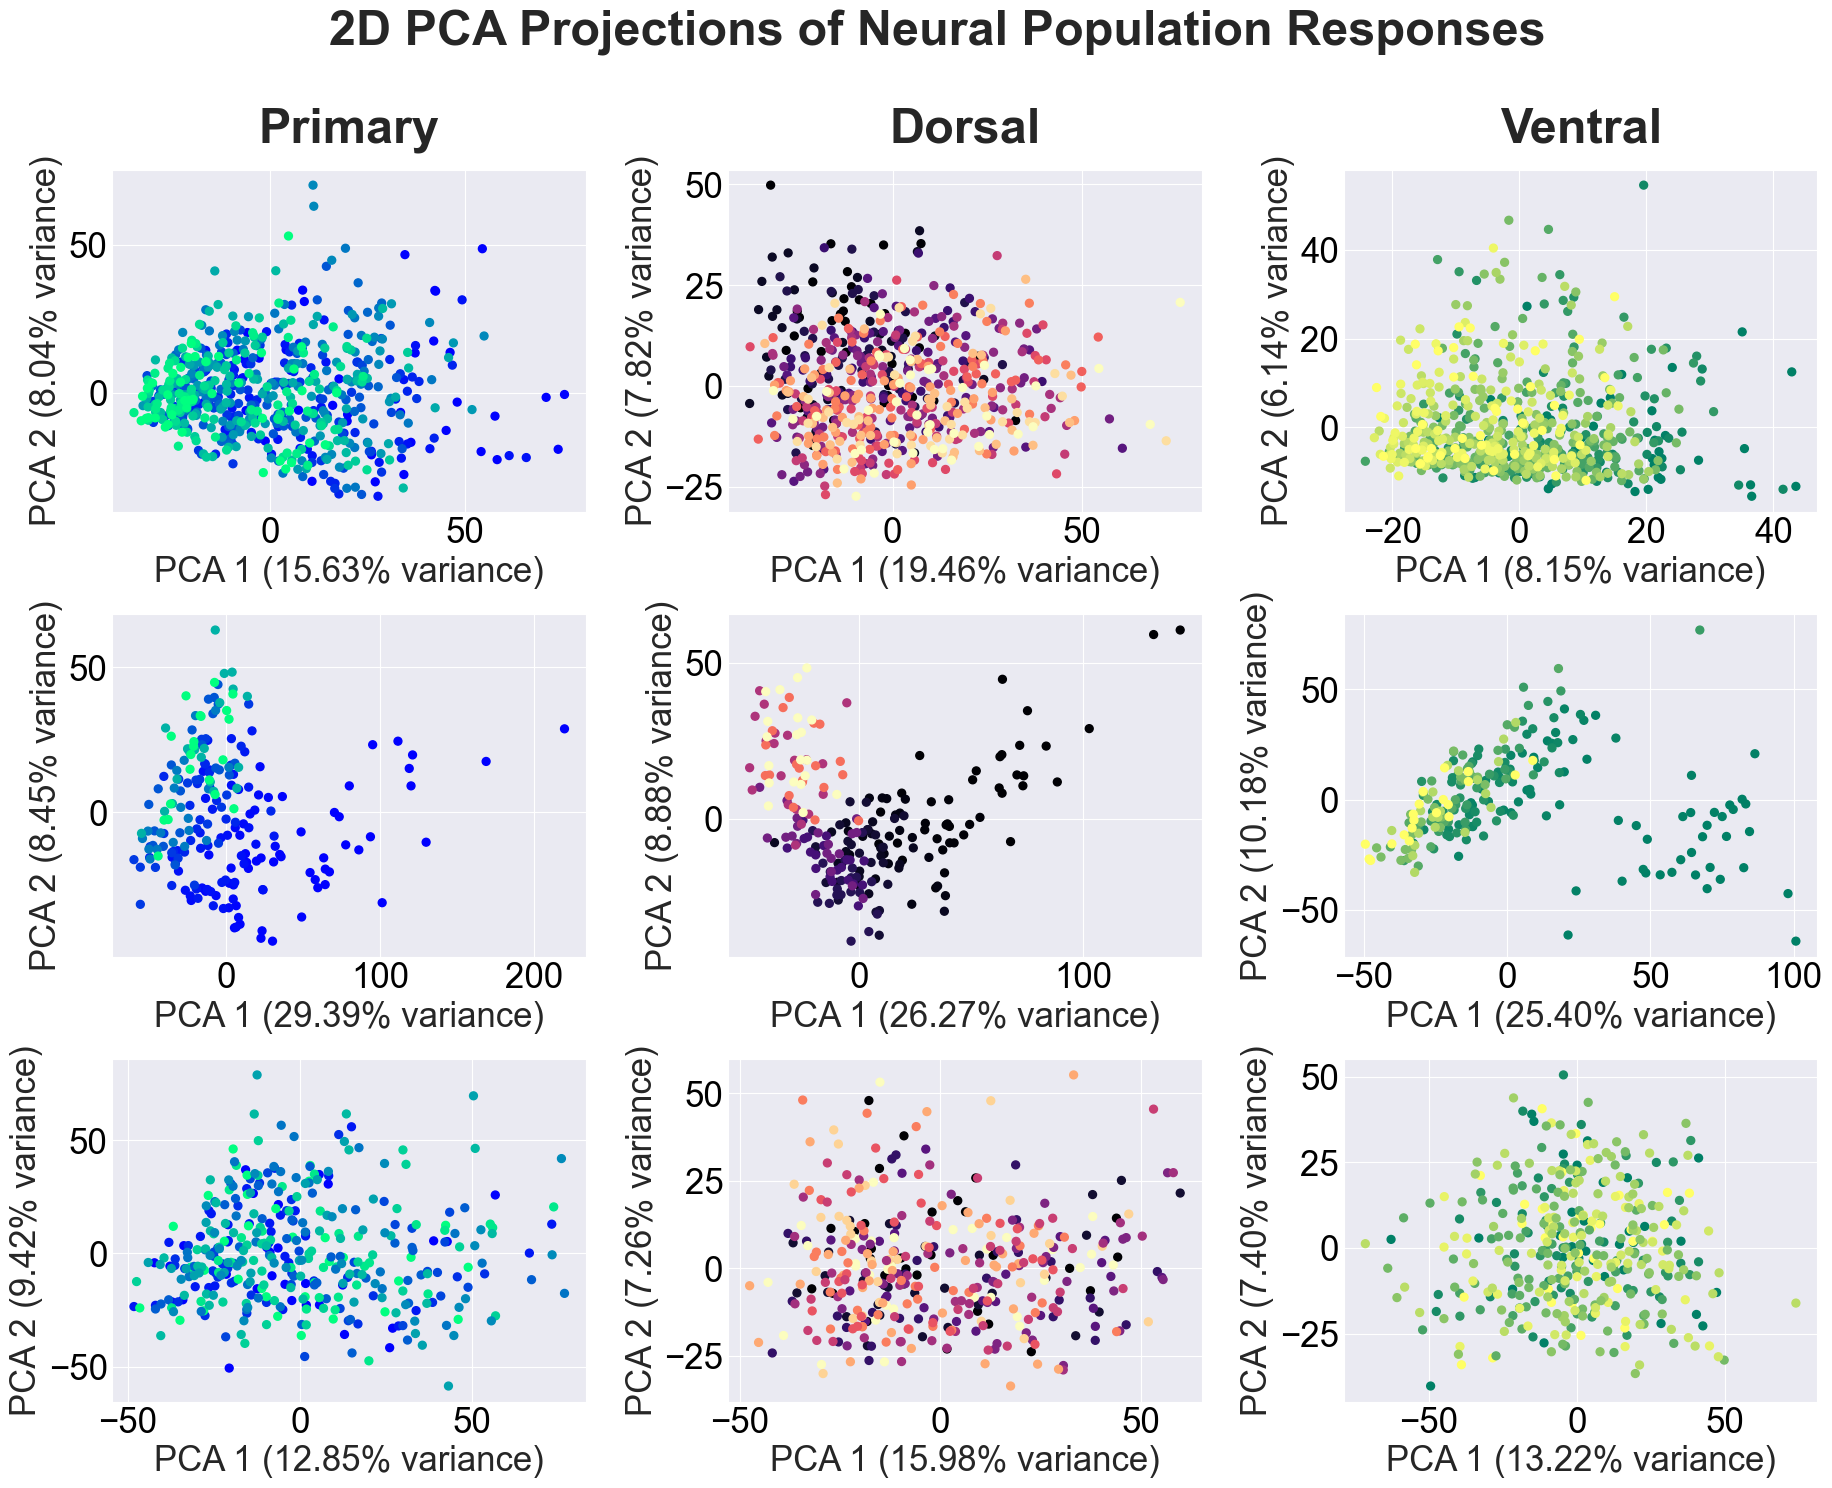

In [18]:
from matplotlib import cm
import numpy as np

# Create a 3x3 grid for 2D PCA subplots
fig_pca, axes_pca = plt.subplots(3, 3, figsize=(22, 16))
fig_pca.suptitle('2D PCA Projections of Neural Population Responses', fontweight='bold', fontsize=35)
plt.subplots_adjust(hspace=0.3)  # Add vertical space between rows

for i, sound_type in enumerate(['PT', 'AM', 'speech']):
    for j, brain_area in enumerate(params.targetSiteNames):
        data = data_dict.get((brain_area, sound_type))
        selected_indices = np.random.choice(data['X'].shape[1], 111, replace=False)
        data_111_X = data['X'][:, selected_indices]
        data_neurons = {"X": data_111_X, "Y": data['Y']}

        title = f'{brain_area} - {sound_type}, n = {data_neurons["X"].shape[1]}'
        cmap = area_cmaps.get(brain_area)

        # For 'speech' sound type, create a mapping of frequencies to numbers
        if sound_type == 'speech':
            Y_labels = [tuple(row) for row in data["Y"]]
            unique_labels = [(0,0), (0,33), (0,67), (0,100), (33,100), (67, 100), (100,100),
                             (100,67), (100,33), (100,0), (67,0), (33,0)]
            label_to_number = {label: idx for idx, label in enumerate(unique_labels)}
            color_values = np.array([label_to_number[label] for label in Y_labels])
            funcs.plot_2d_pca(axes_pca[i, j], data_neurons, color_values, title, cmap=cmap)

        elif sound_type == 'AM':
            funcs.plot_2d_pca(axes_pca[i, j], data_neurons, data["Y"], title, cmap=cmap)

        elif sound_type == 'PT':
            funcs.plot_2d_pca(axes_pca[i, j], data_neurons, np.log10(data["Y"]), title, cmap=cmap)
        
        # Styling for axes and titles
        ax = axes_pca[i, j]
        ax.tick_params(axis='both', direction='in', length=6, width=1, colors='black')
        ax.tick_params(axis='both', labelsize=25)
        ax.xaxis.label.set_size(25)
        ax.yaxis.label.set_size(25)
        if i == 0:
            area_label = brain_area.replace(" auditory area", "")  # Simplify
            ax.set_title(area_label, fontsize=35, fontweight='bold', pad=20)
plt.subplots_adjust(wspace=0.3)  # You can try 0.4 if it's still cramped 
# Save as PNG
fig_pca.savefig("/Users/zoetomlinson/Desktop/GitHub/neuronalDataResearch/Figures/Population Plots/2D_PCA_Plots.png")
plt.show()